In [1]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [6]:
# con = duckdb.connect('../results/duckdb.db', read_only=True)
con = duckdb.connect('../results/duckdb_old.db', read_only=True)
# con.execute("IMPORT DATABASE '../results/duckdb_old'")

In [7]:
results_df = con.execute("""
SELECT total_count,
       type,
       column_count,
       power,
       group_count,
       threads,
       median(time) as time
FROM results
GROUP BY total_count,
         type,
         column_count,
         power,
         group_count,
         threads
""").fetchdf()

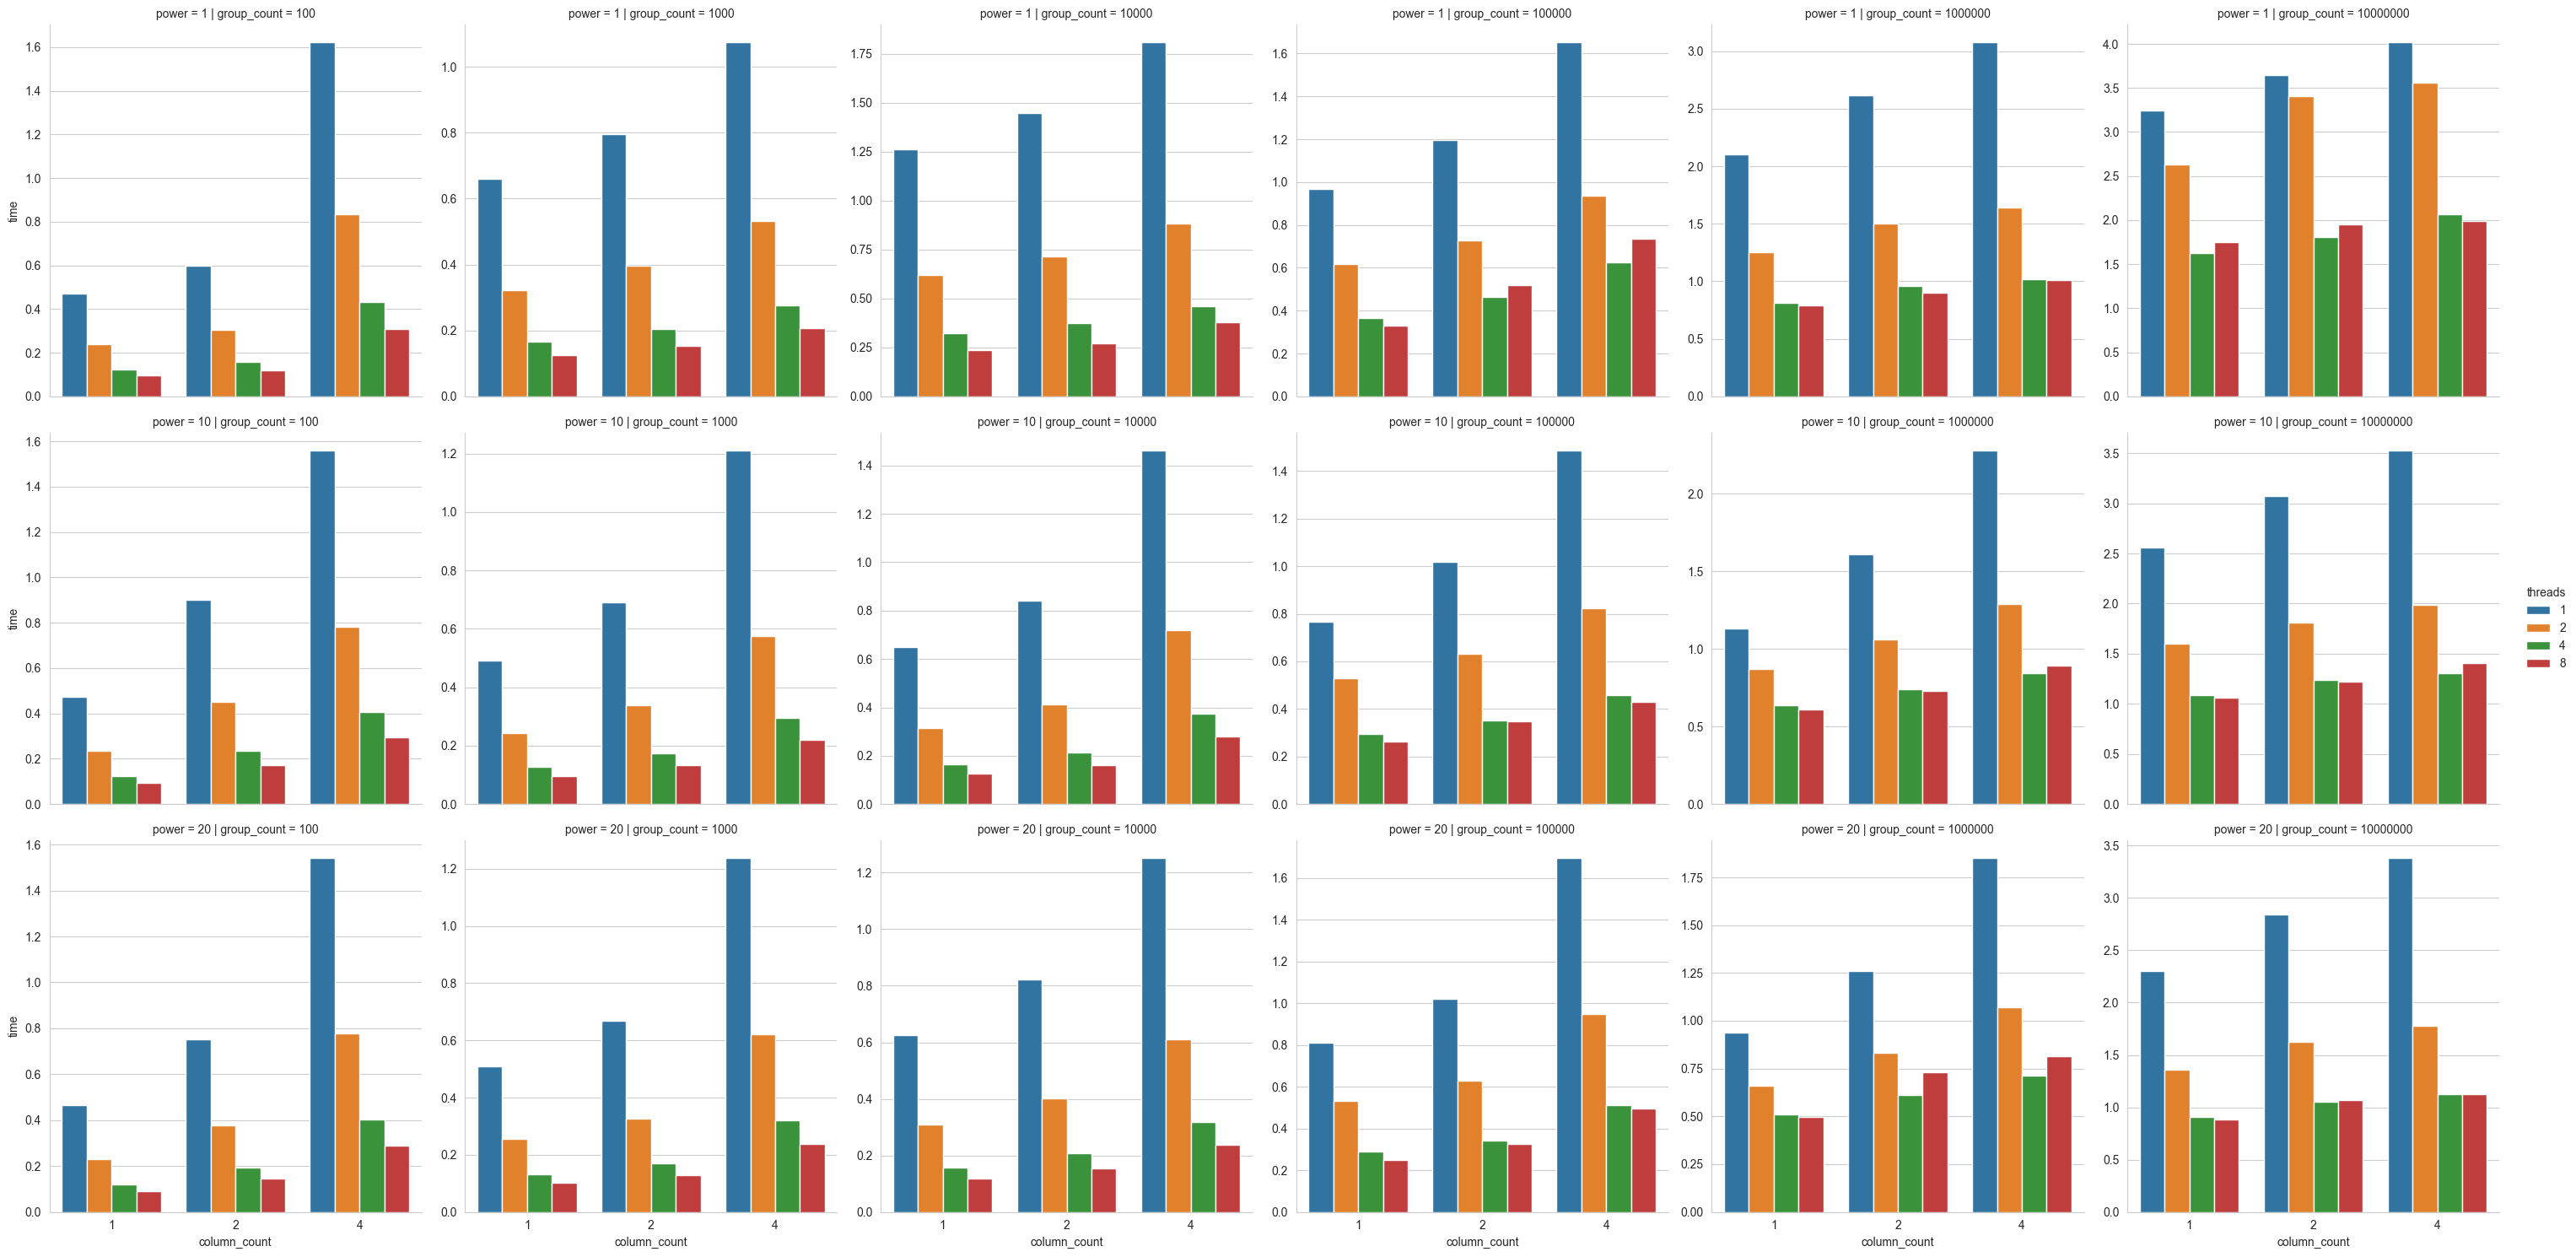

In [8]:
sns.catplot(results_df,
            kind='bar',
            x='column_count',
            y='time',
            row='power',
            col='group_count',
            hue='threads',
            sharey=False)
plt.show()

In [52]:
ccs = [
    (131072,130211),
    (262144,258761),
    (500000,487540),
    (500000,500000),
    (524288,510583),
    (1048576,994432),
    (2097152,1891092),
    (4194304,3425118),
    (8388608,5676728),
    (16777216,8129418),
    (33554432,9650549),
]

In [293]:
# ccs = [
#     (125000,117154),
#     (250000,220471),
#     (500000,391738),
#     (1000000,631301),
#     (2000000,864692),
#     (4000000,981536),
#     (8000000,999686),
#     (16000000,999999),
#     (32000000,999999),
# ]

In [11]:
def ev(n, k):
    return k * (1 - (1 - 1 / k)**n)

In [12]:
def var(n, k):
    a = k * (k - 1) * (1 - 2 / k)**n
    b = k * (1 - 1 / k)**n
    c = k**2 * (1 - 1 / k)**(2 * n)
    
    retval = a + b - c
    return retval if retval >= 0 else -retval

In [57]:
# limit = 1_000_000_000
# ccs = [(64000, 61951)]
for count, unique in ccs:
    limit = unique * 25
    expected = ev(count, limit)
    variance = var(count, limit)
    stdev = variance ** 0.5
    bound_max = expected - 3 * stdev
    print(limit, count, unique, bound_max, unique > bound_max)

3255275 131072 130211 128319.28336688883 True
6469025 262144 258761 256692.23548400577 True
12188500 500000 487540 489749.7308431612 False
12500000 500000 500000 490021.85611608427 True
12764575 524288 510583 513255.4734325372 False
24860800 1048576 994432 1026339.5871133574 False
47277300 2097152 1891092 2049344.7647784445 False
85627950 4194304 3425118 4092313.2836679765 False
141918200 8388608 5676728 8133171.876369236 False
203235450 16777216 8129418 16101068.489444712 False
241263725 33554432 9650549 31321524.332353782 False


39.903723332936224